## Apache Spark Examples

Apache Spark is an open source framework focused on massive parallel data manipulation.

Spark provides a distributed engine able to scale from a single computer to clusters made of thousands of nodes. The engine can be driven using a set of API available for Java, Scala, Python and R languages.

Below you can find some examples made using the Python API, also known as PySpark.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import matplotlib.pyplot as plt

# The SparkSession is the main entry point to interact with Spark engine
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Load the natality dataset stored as Parquet files (1.7 GB compressed)
df = spark.read.parquet('/user/arota/esperia')

In [ ]:
# Ask to Spark to count how many records are in the dataset
number_of_records = df.count()
print('Il dataset contiene %.3f milioni di record' % (number_of_records / 1e6))

In [4]:
# Visualize the structure of the dataset (column names and types)
df.printSchema()

root
 |-- source_year: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- wday: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- is_male: boolean (nullable = true)
 |-- child_race: integer (nullable = true)
 |-- weight_pounds: float (nullable = true)
 |-- plurality: integer (nullable = true)
 |-- apgar_1min: integer (nullable = true)
 |-- apgar_5min: integer (nullable = true)
 |-- mother_residence_state: string (nullable = true)
 |-- mother_race: integer (nullable = true)
 |-- mother_age: integer (nullable = true)
 |-- gestation_weeks: integer (nullable = true)
 |-- lmp: string (nullable = true)
 |-- mother_married: boolean (nullable = true)
 |-- mother_birth_state: string (nullable = true)
 |-- cigarette_use: boolean (nullable = true)
 |-- cigarettes_per_day: integer (nullable = true)
 |-- alcohol_use: boolean (nullable = true)
 |-- drinks_per_week: integer (nullable = true)
 

In [6]:
# Count how many babies were born each year and order the result by year
babies_by_year_df = df.groupBy('year') \
    .count() \
    .orderBy('year')

babies_by_year_df.show()

+----+-------+
|year|  count|
+----+-------+
|1969|1800103|
|1970|1868900|
|1971|1781774|
|1972|1749402|
|1973|1839736|
|1974|2029150|
|1975|2232406|
|1976|2463852|
|1977|2772206|
|1978|2865686|
|1979|3184421|
|1980|3310301|
|1981|3319054|
|1982|3376813|
|1983|3337883|
|1984|3360871|
|1985|3765064|
|1986|3760695|
|1987|3813216|
|1988|3913793|
+----+-------+
only showing top 20 rows



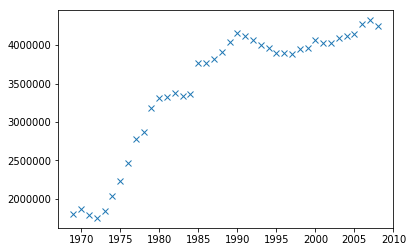

In [7]:
# Plot the number of babies by year
pd = babies_by_year_df.toPandas()
plt.plot(pd['year'], pd['count'], 'x');

In [8]:
# Now we want to discover which is the month with highest natality
babies_by_month_df = df.groupBy('month') \
    .count() \
    .orderBy(f.col('count').desc())

babies_by_month_df.show()

+-----+--------+
|month|   count|
+-----+--------+
|    8|12284300|
|    7|12148131|
|    9|12027623|
|   10|11755249|
|    3|11514925|
|    5|11492474|
|   12|11474828|
|    6|11393383|
|    1|11209768|
|   11|11062739|
|    4|10990267|
|    2|10473076|
+-----+--------+



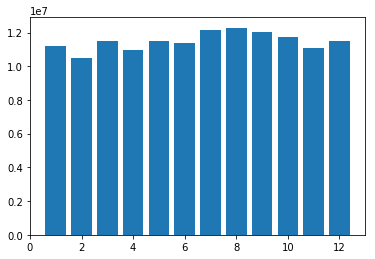

In [9]:
# Plot the results as histogram
pd = babies_by_month_df.toPandas()
plt.bar(pd['month'], pd['count']);